In [43]:
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, parser='auto')
import numpy as np 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt



In [ ]:
mnist.keys()

In [24]:
### Data
X, y = mnist["data"].values, mnist["target"].values
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### support vector machine
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
some_digit = X[5]
svm_clf.predict([some_digit])

array(['2'], dtype=object)

In [10]:
### Calling the decision tree function method, you will see that it returns 10 scores per instance instead of just 1
### Thats one score per class it`s the number of won duels plus or minus a small tweak to break ties, based
### on the binary classifier

In [11]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [14]:
np.argmax(some_digit_scores)
svm_clf.classes_
svm_clf.classes_[5]

'5'

In [16]:
ovr_clf = OneVsRestClassifier(SVC())

In [17]:
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])
len(ovr_clf.estimators_)

10

In [26]:
sgd_clf = SGDClassifier()

sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array(['2'], dtype='<U1')

In [27]:
sgd_clf.decision_function([some_digit])

array([[-25766.00608288, -28792.34316926,   7222.14526891,
         -5810.39358613,  -9691.21863697,  -9803.51593898,
        -20632.67582851, -14376.57049792,  -4921.83344393,
         -5040.62400309]])

In [30]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87745, 0.8521 , 0.88485])

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9015, 0.8939, 0.902 ])

In [35]:
### Error analysis

In [38]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)

In [39]:
conf_mx

array([[5562,    0,   21,    6,    8,   45,   33,    5,  242,    1],
       [   0, 6399,   36,   24,    4,   43,    4,    7,  215,   10],
       [  28,   28, 5217,   97,   71,   24,   67,   38,  380,    8],
       [  20,   18,  116, 5218,    1,  205,   25,   38,  420,   70],
       [  10,   14,   46,    9, 5178,   11,   33,   25,  358,  158],
       [  25,   15,   30,  164,   53, 4449,   74,   14,  540,   57],
       [  28,   16,   43,    3,   42,   96, 5552,    3,  134,    1],
       [  21,    8,   51,   28,   50,   13,    3, 5696,  192,  203],
       [  17,   64,   48,   88,    3,  124,   24,   10, 5432,   41],
       [  20,   18,   29,   64,  117,   36,    1,  178,  412, 5074]])

In [ ]:
### More convenient to look at the numbers as an image representation. We can observethat the 5 look slightly
### darker than the other digits, which could mean that there are fewer images of 5 in the dataset
### or that the classifier does not perform as well on 5 as on other digits.

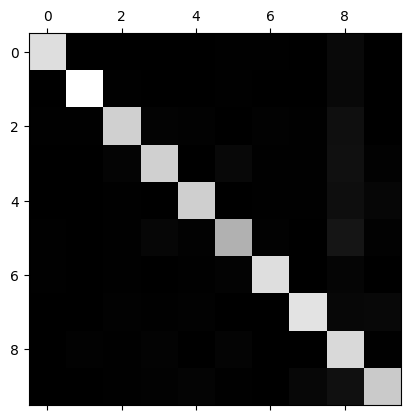

In [49]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [45]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [ ]:
### It is noticeble that the kind of errors the classifier makes.Remembering that rows represent actual classes,
### while columns represent predicted classes. The column for class 8 is quite bright, which tells you that many
### images get misclassified as 8. However, the for class 8 is not that bad, telling you that actual 8 in general
### get properly classified as 8. As you can see, the confusion matrix is not necessarly symmetrical. It is also
### noticible that 3 and 5 often get confused (in both directions).
### Analyzing the confusion matrix often gives insights into ways to improve the classifier.

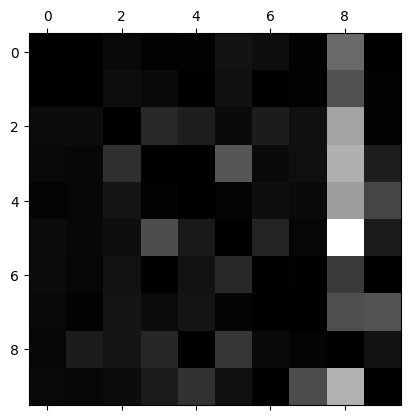

In [46]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

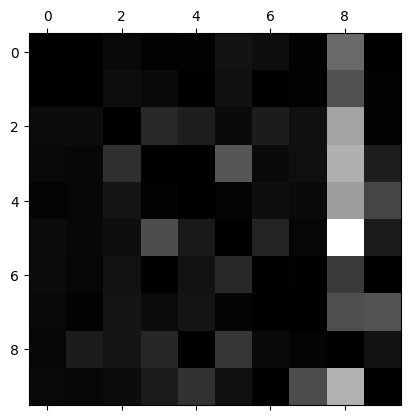

In [47]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()